# Plots for Paper

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

C:\APPS\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\APPS\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\APPS\Anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times'], 'size':12})
rc('text', usetex=True)
import sys 
sys.path.append("C:/APPS/MiKTeX/21.7/fonts/source/public/rsfs")

In [3]:
# create plot directory if it does not already exist
os.makedirs("results/plots", exist_ok=True)

In [4]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

In [5]:
def add_labels(x,y, ax):
    for i in range(len(x)):
        ax.text(x[i], y[i]+0.04, y[i], ha = 'center')

In [6]:
sns.color_palette("Paired")

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [7]:
# flag whether figures should be saved or not
save_fig = True

## Weighting

In [8]:
# import data for weights
weights = pd.read_csv("results/weighting.csv", index_col=0)
weights

,Efficient Grid,Fairness and Customer Acceptance,Expansion of DER,Efficient Electricity Usage
Stakeholder,,,,
Authority,0.728584,0.162579,0.021767,0.087069
Politics,0.090909,0.454545,0.340909,0.113636
Third Party,0.454545,0.090909,0.113636,0.340909
DSO,0.785391,0.148815,0.032897,0.032897
Regulator,0.795863,0.121149,0.041494,0.041494


In [9]:
tmp = sns.color_palette("Paired")
colors = [tmp[5], tmp[10], tmp[2], tmp[1]]

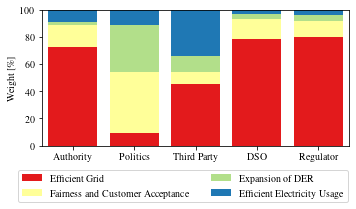

In [10]:
ax = weights.multiply(100).loc[["Authority", "Politics", "Third Party", "DSO", "Regulator"]].plot.bar(
    stacked=True, color=colors, figsize=(5.5,2.5))#(5.5,3.5)
change_width(ax, 0.8)
ax.set_xlabel("")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_ylim(0,100)
ax.set_ylabel("Weight [\%]")
plt.legend(ncols=2, loc="lower center", bbox_to_anchor=(0.46,-0.45))
if save_fig:
    plt.savefig('results/plots/weights.pdf', bbox_inches='tight')

## Level of Fulfillment

In [11]:
results = pd.read_csv("results/result_matrix.csv", index_col=0)
results

,Volumetric Tariff,Monthly Power Peak,Yearly Power Peak,Capacity Tariff,Scenario
Efficient Grid,0.727145,0.741548,0.745419,0.748067,1
Fairness and Customer Acceptance,0.500000,0.545728,0.539677,0.535830,1
Expansion of DER,0.768011,0.780376,0.726230,0.628305,1
Efficient Electricity Usage,0.750000,0.721540,0.725351,0.727559,1
Efficient Grid,0.701651,0.722842,0.734040,0.739553,2
Fairness and Customer Acceptance,0.576840,0.728227,0.695446,0.676341,2
Expansion of DER,0.755539,0.763193,0.715160,0.625355,2
Efficient Electricity Usage,0.750000,0.686311,0.697072,0.701393,2
Efficient Grid,0.563819,0.731655,0.765236,0.771632,3
Fairness and Customer Acceptance,0.575685,0.758570,0.725463,0.739485,3


In [12]:
tariffs = ['Volumetric Tariff', 'Monthly Power Peak', 'Yearly Power Peak', 'Capacity Tariff']

In [13]:
scenarios = [1, 2, 3, 4]
scenario_names = {
    1: "Scenario 1: High Inflexibility",
    2: "Scenario 2: Increase in Peak-Consumption",
    3: "Scenario 3: Increase in Local Production", 
    4: "Scenario 4: High Flexibility"
}

In [14]:
criteria_translation = {
    "Reflection of Costs": 'Reflection\nof Costs',
    "Reflection of Usage-Related Costs": 'Reflection\nof Usage-\nRelated Costs',
    "Reflection of Capacity-Related Costs": 'Reflection\nof Capacity-\nRelated Costs',
    "Fairness and Customer Acceptance": 'Fairness and\nCustomer\nAcceptance',
    "Expansion of DER": 'Expansion\nof DER', 
    "Efficient Electricity Usage": 'Efficient\nElectricity\nUsage',
    "Efficient Grid": 'Efficient\nGrid'}

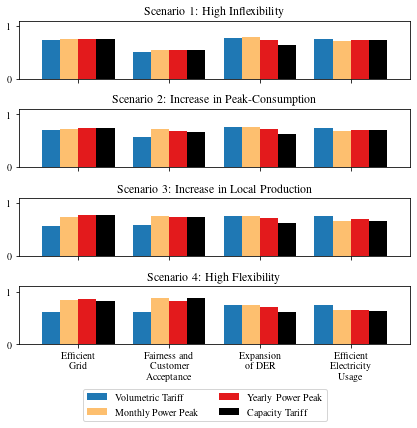

In [15]:
tmp = sns.color_palette("Paired")
colors = [tmp[1], tmp[6], tmp[5], "k"]
fig, axes = plt.subplots(4, figsize=(6, 5.5))
for idx, ax in enumerate(axes):
    plot_df = results.loc[results["Scenario"]==scenarios[idx]][tariffs].rename(index=criteria_translation)
    plot_df.plot.bar(color=colors, width=0.8, ax=ax)
    ax.legend().remove()
    if idx==3:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    else:
        ax.set_xticklabels([])
    ax.set_title(scenario_names[scenarios[idx]])
    ax.set_ylim((0,1.1))
plt.tight_layout()
plt.legend(ncols=2, loc="lower center", bbox_to_anchor=(0.475,-1.4))
if save_fig:
    plt.savefig('results/plots/fulfillment.pdf', bbox_inches='tight')

In [16]:
scenario_names_reduced = {
    1: "Scenario 1: Low Flexibility",
    4: "Scenario 2: High Flexibility"
}

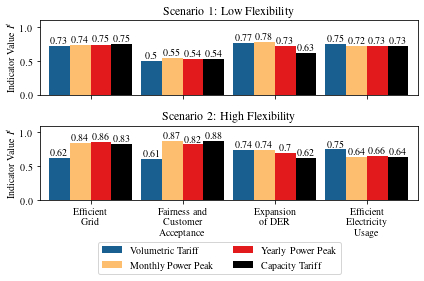

In [17]:
tmp = sns.color_palette("Paired")
colors = [tmp[1], tmp[6], tmp[5], "k", tmp[2]]
colors[0] = tuple((color*0.8 for color in colors[0]))
colors[4] = tuple((color*0.8 for color in colors[4]))
fig, axes = plt.subplots(2, figsize=(6., 3.5))
for idx, scenario in enumerate([1, 4]):
    ax=axes[idx]
    plot_df = results.loc[results["Scenario"]==scenario][tariffs].rename(index=criteria_translation)
    plot_df.plot.bar(color=colors, width=0.9, ax=ax)
    ax.legend().remove()
    if idx==1:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    else:
        ax.set_xticklabels([])
    ax.set_title(scenario_names_reduced[scenario])
    ax.set_ylim((0,1.1))
    ax.set_ylabel("Indicator Value $I^i$")
    tmp = plot_df.round(2)
    for i, idx in enumerate(tmp.index):
        y = list(tmp.loc[idx].values)
        x = [i-0.34+0.225*j for j in range(len(tmp))]
        add_labels(x, y, ax)
    ax.set_xlim(-0.55,3.55)
plt.tight_layout()
plt.legend(ncols=2, loc="lower center", bbox_to_anchor=(0.475,-1.05))
# plt.savefig('results/plots/fulfillment_reduced_hybrid.pdf', bbox_inches='tight')
if save_fig:
    plt.savefig('results/plots/fulfillment_reduced_labels.pdf', bbox_inches='tight')

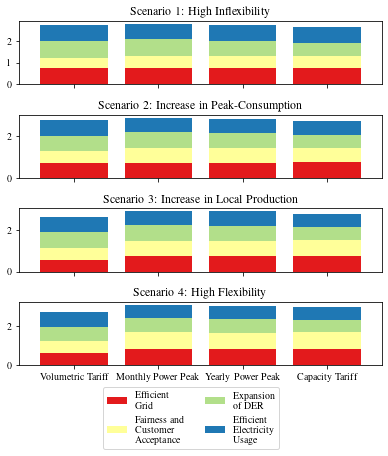

In [18]:
tmp = sns.color_palette("Paired")
colors = [tmp[5], tmp[10], tmp[2], tmp[1]]#[tmp[5], tmp[6], tmp[10], tmp[2], tmp[1], tmp[9]]
fig, axes = plt.subplots(4, figsize=(5.5, 5.5))
for idx, ax in enumerate(axes):
    plot_df = results.loc[results["Scenario"]==scenarios[idx]][tariffs].rename(index=criteria_translation)
    plot_df.T.plot.bar(color=colors, width=0.8, ax=ax, stacked=True)
    ax.legend().remove()
    if idx==3:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    else:
        ax.set_xticklabels([])
    ax.set_title(scenario_names[scenarios[idx]])
plt.tight_layout()
plt.legend(ncols=2, loc="lower center", bbox_to_anchor=(0.475,-1.4))

In [19]:
results.loc["Fairness and Customer Acceptance"]

,Volumetric Tariff,Monthly Power Peak,Yearly Power Peak,Capacity Tariff,Scenario
Fairness and Customer Acceptance,0.500000,0.545728,0.539677,0.535830,1
Fairness and Customer Acceptance,0.576840,0.728227,0.695446,0.676341,2
Fairness and Customer Acceptance,0.575685,0.758570,0.725463,0.739485,3
Fairness and Customer Acceptance,0.614950,0.869423,0.823386,0.878447,4


## Individual Indicators

In [20]:
# import packages
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import indicators as ind
from data.data_preparation import import_data

In [21]:
from matplotlib import rcParams
rcParams["mathtext.default"] = "regular"

In [22]:
def plot_indicator(name, method_name, ax):
    indicator_df = pd.DataFrame(columns=alternatives)
    for scenario in scenarios:
        indicator_df.loc[scenario] = getattr(ind, method_name)(dt, scenario, nr_alternatives).loc[0]
    indicator_df.rename(index=scenario_names, columns=alternative_names).plot.bar(
        color=colors, width=0.8, figsize=(5.5, 3.5), ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_ylabel(name)
    ax.legend().remove()
    ax.set_ylim((0,1.05))

In [23]:
def plot_indicator_horizontal(name, method_name, ax, xlim=(0, 1.05), ylim=(-0.55,1.55), plot_values=False, 
                              bar_width=0.8, ylabel=None):
    indicator_df = pd.DataFrame(columns=alternatives)
    for scenario in scenarios:
        indicator_df.loc[scenario] = getattr(ind, method_name)(dt, scenario, nr_alternatives).loc[0]
    plot_values_horizontal(indicator_df, name, ax, xlim, ylim, plot_values, bar_width, ylabel)

In [24]:
def plot_values_horizontal(val_df, name, ax, xlim=(0, 1.05), ylim=(-0.55,1.55), plot_values=False, 
                           bar_width=0.8, ylabel=None ):
    plot_df = val_df.rename(index=scenario_names_horizontal, columns=alternative_names)
    plot_df.plot.barh(color=colors, width=bar_width, ax=ax)
    ax.set_xlim(xlim)
    ax.set_xticks([])
    ax.legend().remove()
    ax.set_title(name)
    if plot_values:
        tmp = plot_df.round(2)
        for i, idx in enumerate(tmp.index):
            x = np.round(list(tmp.loc[idx].values),2)
            y = [i-0.35*bar_width+(bar_width/4)*j for j in range(len(x))]
            add_labels_horizontal_v1(x, y,ax, rotation=0)
    if ylabel is not None:
        ax.set_yticklabels([])
    ax.set_ylim(ylim)
    ax.invert_yaxis()

In [25]:
def add_labels_horizontal_v1(x,y, ax, rotation=90):
    colors = ["white", "k", "k", "white"]
    for i in range(len(x)):
        ax.text(x[i]-0.05, y[i], x[i], ha = 'right', va = 'center', rotation=rotation, color=colors[i])

In [26]:
# import input data from simulated network
dt = import_data()

In [27]:
# Number of scenarios
nr_scenarios = 4
scenarios = [1, 4]
scenario_names = {1: "S1: Low Flex", 4: "S2: High Flex" }
scenario_names_horizontal = {1: "S1:\nLow\nFlex", 4: "S2:\nHigh\nFlex" }
scenario_names_full = {
    1: "Scenario 1: Low Flexibility",
    4: "Scenario 2: High Flexibility"
}
# Number of alternatives
nr_alternatives = 4
alternatives = [i+1 for i in range(nr_alternatives)]
alternative_names = {1: "Volumetric Tariff", 2: "Monthly Power Peak", 3: "Yearly Power Peak", 4: "Capacity Tariff"}
# Customer Groups
consumers = ["Inflexible", "PV Owners", "EV Owners", "PV plus Battery", "EV, PV, Battery"]

In [28]:
tmp = sns.color_palette("Paired")
colors = [tmp[1], tmp[6], tmp[5], "k"]
markers = ["o", "v", "d", "*"]
colors[0] = tuple((color*0.8 for color in colors[0]))

In [29]:
colors[0]

(0.09725490196078432, 0.3764705882352941, 0.5647058823529413)

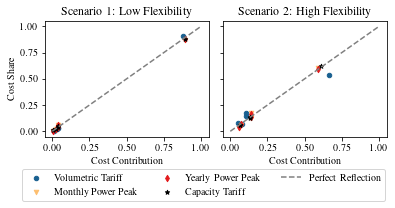

In [30]:
# calculate division into usage- and capacity-related costs
cost_contribution_ur = pd.read_csv("data/cost_contribution_ur.csv", index_col=0,
                                   dtype={0: int})
cost_contribution_ur.columns = cost_contribution_ur.columns.astype(int)
cost_contribution_cr = 1 - cost_contribution_ur
cost_contribution_ur.rename(index=scenario_names, columns=alternative_names)
fig, axes = plt.subplots(1, 2, figsize=(5.5, 2.5))
correlation = pd.DataFrame(columns=alternatives)
slope = pd.DataFrame(columns=alternatives)
for alternative in range(1, nr_alternatives + 1):
    for idx, scenario in enumerate(scenarios):
        tmp = dt[(dt['Scenario'] == scenario) & (dt['Alternative'] == alternative)]
        cost_share = tmp["Cost Share"].values/100
        peak_share = tmp['Peak Share'].values/100
        capacity_share = tmp['Capacity Share'].values/100
        # scale to costs, Eq. (8)
        peak_share_scaled = \
            cost_contribution_ur.loc[scenario, alternative] * peak_share
        # scale to costs, Eq. (9)
        capacity_share_scaled = \
            cost_contribution_cr.loc[scenario, alternative] * capacity_share
        # extract correlation, Eq.()
        correlation.loc[scenario, alternative] = \
            np.corrcoef(cost_share, peak_share_scaled + capacity_share_scaled)[0, 1]
        # extract slope, Eq. () Todo: is a slope > 1 bad? Punishment too high then
        beta_1 = np.polyfit(cost_share, peak_share_scaled + capacity_share_scaled, 1)[0]
        slope.loc[scenario, alternative] = 1 - abs(1-beta_1)
        # Plot scatters
        plot_df = pd.DataFrame()
        y = "Cost Share"
        x = "Cost Contribution"
        plot_df[y] = cost_share
        plot_df[x] = peak_share_scaled + capacity_share_scaled
        plot_df.plot.scatter(x=x, y=y, ax=axes[idx], label=alternative_names[alternative], 
                             color=colors[alternative-1], marker=markers[alternative-1])
        if idx == 1:
            axes[idx].set_ylabel("")
            axes[idx].set_yticklabels("")
        
# add reference line with slope = 1
plot_df = pd.DataFrame()
plot_df["Perfect Reflection"] = [0, 1]
for idx, scenario in enumerate(scenarios):
    plot_df.plot(ax=axes[idx], color="gray", linestyle="--")
    axes[idx].set_title(scenario_names_full[scenario])
    axes[idx].legend().remove()
plt.tight_layout()
plt.legend(ncols=3, loc="lower center", bbox_to_anchor=(-0.12,-0.6))
if save_fig:
    plt.savefig('results/plots/indicators_roc.pdf', bbox_inches='tight')

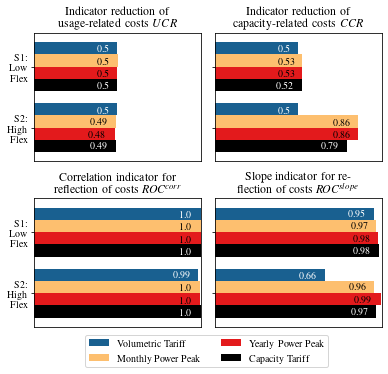

In [31]:
xlim = (0, 1.0)
ylim = (-0.55,1.55)
bar_width = 0.8
plot_values = True
fig, axes = plt.subplots(2,2, figsize=(5.5, 4.75))
# Reduction of usage-related costs - using "Simultaneous Peak"
ax = axes[0,0]
plot_indicator_horizontal("Indicator reduction of\nusage-related costs $\,UCR$", "get_reduction_of_usage_related_costs", 
               ax, xlim=xlim, ylim=ylim, plot_values=plot_values)
# Reduction of capacity-related costs - using "Contracted Capacity"
ax = axes[0,1]
plot_indicator_horizontal("Indicator reduction of\ncapacity-related costs $\,CCR$", "get_reduction_of_capacity_related_costs", 
               ax, xlim=xlim, ylim=ylim, plot_values=plot_values, ylabel=[])
# Plot correlation
ax = axes[1,0]
plot_values_horizontal(correlation, "Correlation indicator for\nreflection of costs $ROC^{corr}$", 
                       ax, xlim, ylim, plot_values, bar_width)
# Plot slope
ax = axes[1,1]
plot_values_horizontal(slope, "Slope indicator for re-\nflection of costs $ROC^{slope}$", 
                       ax, xlim, ylim, plot_values, bar_width, [])
plt.tight_layout()
plt.legend(ncols=2, loc="lower center", bbox_to_anchor=(-0.05,-0.35))

if save_fig:
    plt.savefig('results/plots/indicators_efficient_grid_horizontal.pdf', bbox_inches='tight')

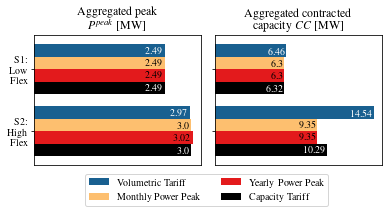

In [32]:
xlim = None
ylim = (-0.55,1.55)
bar_width = 0.8
plot_values = True
# plot cost-driving factors
fig, axes = plt.subplots(1,2, figsize=(5.5, 2.5))
peak = pd.DataFrame(columns=alternatives)
capacity = pd.DataFrame(columns=alternatives)
for idx, scenario in enumerate(scenarios):
    for alternative in range(1, nr_alternatives + 1):
        peak.loc[scenario, alternative] = dt[(dt['Scenario'] == scenario) &
                      (dt['Alternative'] == alternative)]['Simultaneous Peak'].sum()
        capacity.loc[scenario, alternative] = \
                dt[(dt['Scenario'] == scenario) &
                   (dt['Alternative'] == alternative)]['Contracted Capacity'].sum()
# usage-related
ax=axes[0]
plot_values_horizontal(peak.divide(1e3), "Aggregated peak\n$P^{peak}$ [MW]", 
                       ax, xlim, ylim, plot_values, bar_width)
# capacity-related
ax=axes[1]
plot_values_horizontal(capacity.divide(1e3), "Aggregated contracted\ncapacity $CC$ [MW]", 
                       ax, xlim, ylim, plot_values, bar_width, [])
plt.tight_layout()
plt.legend(ncols=2, loc="lower center", bbox_to_anchor=(-0.05,-0.35))
if save_fig:
    plt.savefig('results/plots/indicators_cost_driving_factors_horizontal.pdf', bbox_inches='tight')

In [33]:
rename_dict_der_horizontal = {
    "PV": "PV",
    "PV_BESS": "PV \&\nBattery",
    "EV_PV": "PV",
    "EV_PV_BESS": "PV \&\nBattery",
}

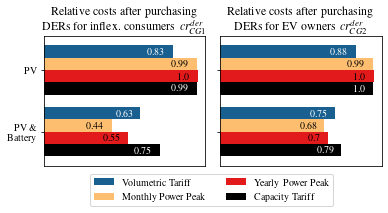

In [34]:
xlim = None
ylim = (-0.55,1.55)
bar_width = 0.8
plot_values = True
# plot cost-driving factors
fig, axes = plt.subplots(1,2, figsize=(5.5, 2.5))
# new calculations
tmp = pd.read_csv("data/pv_cost_reduction.csv", index_col=0).rename(columns={
    "VT": "Volumetric Tariff", "MPT": "Monthly Power Peak", "YPT": "Yearly Power Peak", "CT": "Capacity Tariff"})

ax=axes[0]
plot_values_horizontal(tmp.loc[["PV","PV_BESS"]].rename(rename_dict_der_horizontal), 
                       "Relative costs after purchasing\nDERs for inflex. consumers $\,cr_{CG1}^{der}$", 
                       ax, xlim, ylim, plot_values, bar_width)
ax=axes[1]
plot_values_horizontal(tmp.loc[["EV_PV","EV_PV_BESS"]].rename(rename_dict_der_horizontal), 
                       "Relative costs after purchasing\nDERs for EV owners $\,cr_{CG2}^{der}$", 
                       ax, xlim, ylim, plot_values, bar_width, [])
plt.tight_layout()
plt.legend(ncols=2, loc="lower center", bbox_to_anchor=(-0.05,-0.35))
if save_fig:
    plt.savefig('results/plots/indicators_pv_reduction_horizontal.pdf', bbox_inches='tight')

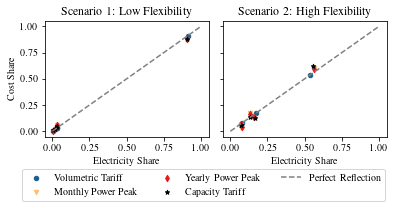

In [35]:
# calculate division into usage- and capacity-related costs
cost_contribution_ur = pd.read_csv("data/cost_contribution_ur.csv", index_col=0,
                                   dtype={0: int})
cost_contribution_ur.columns = cost_contribution_ur.columns.astype(int)
cost_contribution_cr = 1 - cost_contribution_ur
cost_contribution_ur.rename(index=scenario_names, columns=alternative_names)
fig, axes = plt.subplots(1, 2, figsize=(5.5, 2.5))
correlation = pd.DataFrame(columns=alternatives)
slope = pd.DataFrame(columns=alternatives)
for alternative in range(1, nr_alternatives + 1):
    for idx, scenario in enumerate(scenarios):
        tmp = dt[(dt['Scenario'] == scenario) & (dt['Alternative'] == alternative)]
        cost_share = tmp["Cost Share"].values/100
        energy_share = tmp['Energy Share'].values/100
        # extract correlation, Eq.()
        correlation.loc[scenario, alternative] = \
            np.corrcoef(cost_share, energy_share)[0, 1]
        # extract slope, Eq. () Todo: is a slope > 1 bad? Punishment too high then
        beta_3 = np.polyfit(cost_share, energy_share, 1)[0]
        slope.loc[scenario, alternative] = 1 - abs(1 - beta_3)
        # Plot scatters
        plot_df = pd.DataFrame()
        y = "Cost Share"
        x = "Electricity Share"
        plot_df[y] = cost_share
        plot_df[x] = energy_share
        plot_df.plot.scatter(x=x, y=y, ax=axes[idx], label=alternative_names[alternative], 
                             color=colors[alternative-1], marker=markers[alternative-1])
        if idx == 1:
            axes[idx].set_ylabel("")
            axes[idx].set_yticklabels("")
        
# add reference line with slope = 1
plot_df = pd.DataFrame()
plot_df["Perfect Reflection"] = [0, 1]
for idx, scenario in enumerate(scenarios):
    plot_df.plot(ax=axes[idx], color="gray", linestyle="--")
    axes[idx].set_title(scenario_names_full[scenario])
    axes[idx].legend().remove()
plt.tight_layout()
plt.legend(ncols=3, loc="lower center", bbox_to_anchor=(-0.12,-0.6))
if save_fig:
    plt.savefig('results/plots/indicators_roe.pdf', bbox_inches='tight')

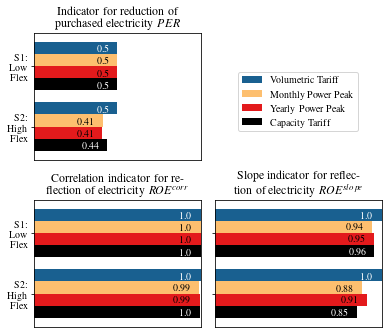

In [36]:
xlim = (0, 1.0)
ylim = (-0.55,1.55)
bar_width = 0.8
plot_values = True
fig, axes = plt.subplots(2,2, figsize=(5.5, 4.75))
# Efficient use of electricity
ax = axes[0,0]
plot_indicator_horizontal("Indicator for reduction of\npurchased electricity $PER$", "get_reduction_of_purchased_electricity", 
               ax, xlim=xlim, ylim=ylim, plot_values=plot_values)
fig.delaxes(axes[0,1])
# Plot correlation
ax = axes[1,0]
plot_values_horizontal(correlation, "Correlation indicator for re-\nflection of electricity $ROE^{corr}$", 
                       ax, xlim, ylim, plot_values, bar_width)
# Plot slope
ax = axes[1,1]
plot_values_horizontal(slope, "Slope indicator for reflec-\ntion of electricity $ROE^{slope}$", 
                       ax, xlim, ylim, plot_values, bar_width, [])

plt.tight_layout()
plt.legend(ncols=1, loc="lower center", bbox_to_anchor=(0.5,1.5))
if save_fig:
    plt.savefig('results/plots/indicators_efficient_electricity_usage_horizontal.pdf', bbox_inches='tight')

## Overall Ranking

In [37]:
scenario_names = {
    'Scenario 1': "Scenario 1: High Inflexibility",
    'Scenario 2': "Scenario 2: Increase in Peak-Consumption",
    'Scenario 3': "Scenario 3: Increase in Local Production", 
    'Scenario 4': "Scenario 4: High Flexibility"
}

In [38]:
scenario_names_reduced = {
    'Scenario 1': "Scenario 1: Low Flexibility",
    'Scenario 4': "Scenario 2: High Flexibility"
}

In [39]:
results = {}
scenarios = ['Scenario 1', 'Scenario 2', 'Scenario 3', 'Scenario 4']
tmp = pd.read_csv(f"results/end_rating.csv", index_col=0)
tmp=tmp.set_index("Network Tariff")
for scenario in scenarios:
    results[scenario] = tmp.loc[tmp.Scenario==scenario].T.drop("Scenario")

In [40]:
results[scenario]

Network Tariff,Volumetric Tariff,Monthly Power Peak,Yearly Power Peak,Capacity Tariff
Equal Weights,0.659855,0.800319,0.78636,0.779498
Authority,0.632404,0.823969,0.829722,0.815873
Politics,0.673718,0.798009,0.766286,0.759488
Third Party,0.677179,0.763898,0.767842,0.745667
DSO,0.626723,0.832971,0.839158,0.823057
Regulator,0.629012,0.829619,0.837032,0.818288


In [41]:
tmp = sns.color_palette("Paired")
colors = [tmp[1], tmp[6], tmp[5], "k"]
colors[0] = tuple((color*0.8 for color in colors[0]))

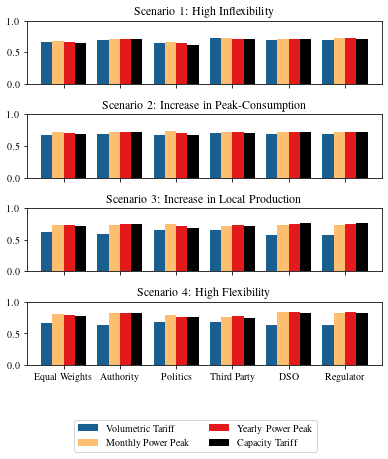

In [42]:
fig, axes = plt.subplots(4, figsize=(5.5, 5.5))
for idx, ax in enumerate(axes):
    results[scenarios[idx]].plot.bar(color=colors, width=0.8, ax=ax)
    ax.legend().remove()
    if idx==3:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    else:
        ax.set_xticklabels([])
    ax.set_title(scenario_names[scenarios[idx]])
    ax.set_ylim((0,1))
plt.tight_layout()
plt.legend(ncols=2, loc="lower center", bbox_to_anchor=(0.475,-1.45))
if save_fig:
    plt.savefig('results/plots/ranking.pdf', bbox_inches='tight')

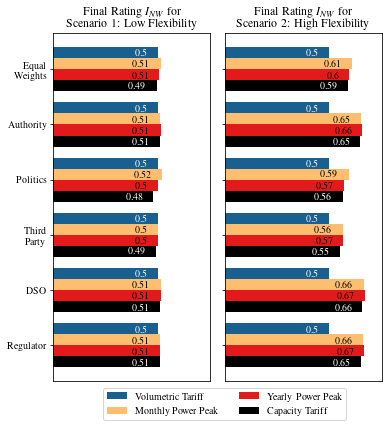

In [43]:
rename_dict = {
    "Equal Weights": "Equal\nWeights",
    "Third Party": "Third\nParty"
}
scaling_value = 0.5
xlim = (0, 0.75)
ylim = None
bar_width = 0.8
fig, axes = plt.subplots(1,2, figsize=(5.5, 5.5))
ylabels = [None, []]
for idx, scenario in enumerate(["Scenario 1", "Scenario 4"]):
    ax=axes[idx]
    scaling = scaling_value/results[scenario]["Volumetric Tariff"]
    plot_values_horizontal(results[scenario].T.multiply(scaling).T.rename(rename_dict), 
                           "Final Rating $I_{NW}$"+f" for\n{scenario_names_reduced[scenario]}", 
                       ax, xlim, ylim, plot_values, bar_width, ylabels[idx])
plt.tight_layout()
plt.legend(ncols=2, loc="lower center", bbox_to_anchor=(0.,-0.125))
if save_fig:
    plt.savefig('results/plots/ranking_reduced_scaled_horizontal.pdf', bbox_inches='tight')

In [44]:
tmp = results["Scenario 1"]
for col in tmp.columns:
    tmp[col] = pd.to_numeric(tmp[col])

In [45]:
tmp.idxmax(axis=1)

Equal Weights    Monthly Power Peak
Authority         Yearly Power Peak
Politics         Monthly Power Peak
Third Party      Monthly Power Peak
DSO               Yearly Power Peak
Regulator         Yearly Power Peak
dtype: object

In [46]:
tmp.idxmin(axis=1)

Equal Weights      Capacity Tariff
Authority        Volumetric Tariff
Politics           Capacity Tariff
Third Party        Capacity Tariff
DSO              Volumetric Tariff
Regulator        Volumetric Tariff
dtype: object

In [47]:
tmp = results["Scenario 4"]
for col in tmp.columns:
    tmp[col] = pd.to_numeric(tmp[col])

In [48]:
tmp.idxmax(axis=1)

Equal Weights    Monthly Power Peak
Authority         Yearly Power Peak
Politics         Monthly Power Peak
Third Party       Yearly Power Peak
DSO               Yearly Power Peak
Regulator         Yearly Power Peak
dtype: object

In [49]:
tmp.idxmin(axis=1)

Equal Weights    Volumetric Tariff
Authority        Volumetric Tariff
Politics         Volumetric Tariff
Third Party      Volumetric Tariff
DSO              Volumetric Tariff
Regulator        Volumetric Tariff
dtype: object